# Time Series of YCSD Covid Case Metric

This notebook examines the time series of the York County COVID Cases ostensibly used by YCSD to make decisions about school reopenings.

* YCSD presents there metrics on https://ycsd.yorkcountyschools.org/domain/1313
* VDH represents the this number for the localities on https://www.vdh.virginia.gov/coronavirus/coronavirus/covid-19-in-virginia-locality/ and on https://www.vdh.virginia.gov/coronavirus/key-measures/pandemic-metrics/school-metrics/ under the localities tab
* VDH shares the data at https://data.virginia.gov/Government/VDH-COVID-19-PublicUseDataset-Cases/bre9-aqqr
* I'm sharing This notebook in Github at https://github.com/drf5n/YCSD_covid_metrics and https://github.com/drf5n/YCSD_covid_metrics/blob/master/YorkCountyCovidMetric.ipynb
* CDC has https://beta.healthdata.gov/Community/COVID-19-State-Profile-Report-Virginia/3ghy-svgi 

-- David Forrest 2020-12-04


In [1]:
# %matplotlib widget
import os,sys,io, time, datetime, pathlib
import pandas as pd
#import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt

import bokeh.plotting
import bokeh.io
import bokeh.models
from bokeh.io import output_notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
def file_age(filepath):
    return time.time() - os.path.getmtime(filepath)


In [3]:
#os.getcwd()
#!wget -O $df_name 'https://data.virginia.gov/api/views/bre9-aqqr/rows.csv?accessType=DOWNLOAD'
#! pwd ; ls


In [4]:
# get the Virginia COVID Case data from https://data.virginia.gov/Government/VDH-COVID-19-PublicUseDataset-Cases/bre9-aqqr

df_name = "VA_vdh_casedata.csv"

df=pd.read_csv(df_name)
#display(datetime.datetime.now() - pd.to_datetime(df['Report Date'].iloc[-1])   )
#display(datetime.datetime.now() - pd.to_datetime(df['Report Date'].iloc[-1])  > datetime.timedelta(days=1) )

#if 1 or file_age(df_name) > 86400/2:
if 1 or not os.path.exists(df_name) or (datetime.datetime.now() - pd.to_datetime(df['Report Date'].iloc[-1])  > datetime.timedelta(days=1)) :
    !wget -O $df_name 'https://data.virginia.gov/api/views/bre9-aqqr/rows.csv?accessType=DOWNLOAD'
    ! pwd ; ls
    pathlib.Path(df_name).touch()
df=pd.read_csv(df_name)
df["date"] = pd.to_datetime(df['Report Date'])
last_date = df['date'].iloc[-1]

if ((datetime.datetime.now() - last_date).days  >= 1) :
    display(f"{df_name} is still old with {last_date} versus {datetime.datetime.now()}")
else:
    display(f"{df_name} is up to date at {last_date} versus {datetime.datetime.now()}")

--2022-01-18 14:31:44--  https://data.virginia.gov/api/views/bre9-aqqr/rows.csv?accessType=DOWNLOAD
Resolving data.virginia.gov (data.virginia.gov)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.virginia.gov (data.virginia.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘VA_vdh_casedata.csv’

VA_vdh_casedata.csv     [        <=>         ]   4.30M  2.36MB/s    in 1.8s    

2022-01-18 14:31:46 (2.36 MB/s) - ‘VA_vdh_casedata.csv’ saved [4508309]

/Users/drf/2020/Home/School/YCSD_covid_metrics
AllCountyCovidMetric.ipynb          Vaccines.py
AllCountyCovidMetric.py             YorkCountyCovidMetric.ipynb
CDCmaps_foreign_domestic_school.png YorkCountyCovidMetric.py
CovidStates.ipynb                   bre9-aqqr.csv
CovidStates.py                      docs
FrenchCurvePlot.ipynb               geckodriver.log
FrenchCurvePlot.py                  junk
README.md                           map.png
USCovi

'VA_vdh_casedata.csv is up to date at 2022-01-18 00:00:00 versus 2022-01-18 14:31:46.903605'

In [5]:

df = df.sort_values(by=['Locality', 'date'])

df['TC_diff']= df.groupby('Locality')['Total Cases'].diff().fillna(0)
df['TC_sum14']= df.groupby('Locality')['Total Cases'].diff(14).fillna(0)
df['TC_sum7']= df.groupby('Locality')['Total Cases'].diff(7).fillna(0)
df['TC_sum28']= df.groupby('Locality')['Total Cases'].diff(28).fillna(0)

display(df.head())
display(df.tail())


,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,date,TC_diff,TC_sum14,TC_sum7,TC_sum28
0,03/17/2020,51001,Accomack,Eastern Shore,0,0,0,2020-03-17,0.0,0.0,0.0,0.0
133,03/18/2020,51001,Accomack,Eastern Shore,0,0,0,2020-03-18,0.0,0.0,0.0,0.0
266,03/19/2020,51001,Accomack,Eastern Shore,0,0,0,2020-03-19,0.0,0.0,0.0,0.0
399,03/20/2020,51001,Accomack,Eastern Shore,1,0,0,2020-03-20,1.0,0.0,0.0,0.0
532,03/21/2020,51001,Accomack,Eastern Shore,1,0,0,2020-03-21,0.0,0.0,0.0,0.0


,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,date,TC_diff,TC_sum14,TC_sum7,TC_sum28
88938,01/14/2022,51199,York,Peninsula,7917,167,87,2022-01-14,112.0,1434.0,962.0,1976.0
89071,01/15/2022,51199,York,Peninsula,8039,172,87,2022-01-15,122.0,1480.0,938.0,2076.0
89204,01/16/2022,51199,York,Peninsula,8170,175,87,2022-01-16,131.0,1531.0,1009.0,2190.0
89337,01/17/2022,51199,York,Peninsula,8240,177,87,2022-01-17,70.0,1569.0,776.0,2251.0
89470,01/18/2022,51199,York,Peninsula,8332,174,87,2022-01-18,92.0,1562.0,774.0,2325.0


In [6]:
# Read VDH population data donwloaded from https://apps.vdh.virginia.gov/HealthStats/stats.htm 
# and https://apps.vdh.virginia.gov/HealthStats/documents/xls/2018%20Pop.xls 

pop_file = '/Users/drf/Downloads/2018 Pop.xls'
if not os.path.exists(pop_file):
    ! wget -O "$pop_name" https://apps.vdh.virginia.gov/HealthStats/documents/xls/2018%20Pop.xls

popxls=pd.read_excel('/Users/drf/Downloads/2018 Pop.xls',header=[3])
popxls['FIPS']=51000+(popxls.loc[:,'Code'].fillna(0)).astype(int)  # eliminate NaNs above?
#display(popxls[popxls['Code']==199]['Population'])
#display(popxls['Locality'].str.match('York County').fillna(False))
display(popxls[popxls['Locality'].str.match('York County').fillna(False)])
display(popxls[popxls['Locality'].str.contains('Virginia Beach').fillna(False)])
#display("City:",popxls[popxls['Locality'].str.contains('City').fillna(False)])



,Code,Region,District,Locality,Population,0,1-4,5-9,10-14,15-17,...,20-24.1,25-34,35-44,45-54,55-64,65-74,75-84,85+,0,FIPS
126,199.0,5.0,21.0,York County ...,67846.0,640.0,3151.0,4480.0,4823.0,3062.0,...,4240.0,7876.0,8869.0,8805.0,9284.0,6311.0,3428.0,1218.0,640.0,51199


,Code,Region,District,Locality,Population,0,1-4,5-9,10-14,15-17,...,20-24.1,25-34,35-44,45-54,55-64,65-74,75-84,85+,0,FIPS
124,810.0,5.0,20.0,Virginia Beach City ...,450189.0,5609.0,22638.0,27497.0,27714.0,16115.0,...,31409.0,74440.0,59481.0,55457.0,55664.0,37719.0,18653.0,7632.0,5609.0,51810


In [7]:
# subset for York and normalize per capita
loi='York'

VDH_pop = int(popxls[popxls['Locality'].str.match('York').fillna(False)]['Population'])
display("VDH_pop: ",VDH_pop)


dfy = df[df['Locality']=='York'].copy()
dfy['per100k_14daysum']=dfy['TC_sum14']*100000/VDH_pop
dfy['per100k_7daysum']=dfy['TC_sum7']*100000/VDH_pop


dfy['per100k_1daymean']=dfy['TC_diff']*100000/VDH_pop
dfy['per100k_7daymean']=dfy['TC_sum7']*100000/VDH_pop/7
dfy['per100k_14daymean']=dfy['TC_sum14']*100000/VDH_pop/14
dfy['per100k_28daymean']=dfy['TC_sum28']*100000/VDH_pop/28





# for VB:

if 0:
    loi='Virginia Beach'

    dfy = df[df['Locality']=='Virginia Beach'].copy()
    dfy['per100k_14daysum']=dfy['TC_sum14']*100000/450189  


'VDH_pop: '

67846

In [8]:
dfy.tail(30)

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,date,TC_diff,TC_sum14,TC_sum7,TC_sum28,per100k_14daysum,per100k_7daysum,per100k_1daymean,per100k_7daymean,per100k_14daymean,per100k_28daymean
85517,12/20/2021,51199,York,Peninsula,5989,127,84,2021-12-20,9.0,199.0,100.0,340.0,293.311323,147.392624,13.265336,21.056089,20.950809,17.897676
85746,12/21/2021,51199,York,Peninsula,6007,127,84,2021-12-21,18.0,205.0,104.0,350.0,302.154880,153.288329,26.530672,21.898333,21.582491,18.424078
85879,12/22/2021,51199,York,Peninsula,6019,127,84,2021-12-22,12.0,201.0,103.0,354.0,296.259175,151.814403,17.687115,21.687772,21.161370,18.634639
86012,12/23/2021,51199,York,Peninsula,6058,128,84,2021-12-23,39.0,218.0,133.0,382.0,321.315921,196.032191,57.483124,28.004599,22.951137,20.108565
86145,12/24/2021,51199,York,Peninsula,6099,129,84,2021-12-24,41.0,247.0,158.0,414.0,364.059782,232.880347,60.430976,33.268621,26.004270,21.793052
86548,12/25/2021,51199,York,Peninsula,6142,129,84,2021-12-25,43.0,279.0,179.0,452.0,411.225422,263.832798,63.378829,37.690400,29.373244,23.793381
86405,12/26/2021,51199,York,Peninsula,6168,130,84,2021-12-26,26.0,292.0,188.0,473.0,430.386463,277.098134,38.322082,39.585448,30.741890,24.898825
86272,12/27/2021,51199,York,Peninsula,6176,130,84,2021-12-27,8.0,287.0,187.0,476.0,423.016832,275.624208,11.791410,39.374887,30.215488,25.056746
86677,12/28/2021,51199,York,Peninsula,6236,130,86,2021-12-28,60.0,333.0,229.0,528.0,490.817439,337.529110,88.435575,48.218444,35.058389,27.794038
86810,12/29/2021,51199,York,Peninsula,6305,130,86,2021-12-29,69.0,389.0,286.0,586.0,573.357309,421.542906,101.700911,60.220415,40.954094,30.847171


<AxesSubplot:title={'center':'York County Number of new cases per 100,000 persons \nwithin the last 7 days'}, xlabel='date'>

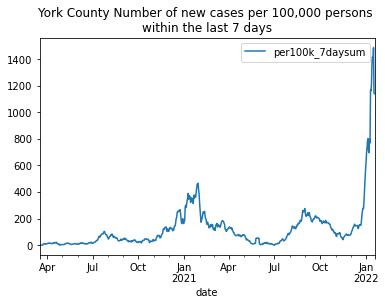

In [9]:
ph = dfy.plot(y='per100k_7daysum',x='date',title="York County Number of new cases per 100,000 persons \nwithin the last 7 days")

ph

<AxesSubplot:title={'center':'York County Cases, daily cases, per 100K'}, xlabel='date'>

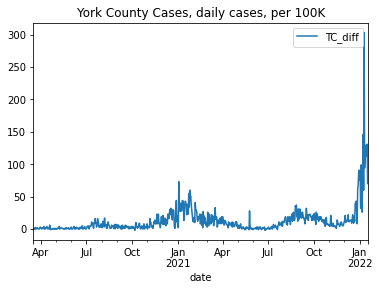

In [10]:
ph = dfy.plot(y='TC_diff',x='date',title="York County Cases, daily cases, per 100K")
ph

In [11]:
TOOLTIPS = [
 #   ("index", "$index"),
 #   ("date:", "$x{%F %T}"),
    ("date:", "@date{%F}"),
    ("cases/7d/100k:","@per100k_7daysum"),
    ("cases/14d/100k:","@per100k_14daysum"),
 #   ("(x,y)", "($x, $y)"),
]

vmax = (int(dfy['per100k_7daysum'].max() / 40 )+2)*40 # 

#bokeh.plotting.output_file('docs/YorkCountyCovidMetric_plot.html', mode='inline')

per100k_7daysum=bokeh.plotting.figure( tooltips=TOOLTIPS, x_axis_type='datetime')
p=bokeh.plotting.figure( x_axis_type='datetime',y_range=(0,vmax),
#                        tooltips=TOOLTIPS,formatters={"$x": "datetime"},
                        title="{} Number of new cases per 100,000 persons within the last 7 days".format(loi))

p.add_layout(bokeh.models.Title(
    text="Code: https://github.com/drf5n/YCSD_covid_metrics", text_font_style="italic"), 'above')

p.add_layout(bokeh.models.Title(
    text="https://drf5n.github.io/YCSD_covid_metrics/YorkCountyCovidMetric_plot.html", text_font_style="italic"), 'above')


hth = bokeh.models.HoverTool(tooltips=TOOLTIPS,
                             formatters={"$x": "datetime",
                                        "@date": "datetime"
                                        },
                             mode='vline',
                            )

print(hth)
print(hth.formatters)
p.add_tools(hth)
#hover = p.select(dict(type=bokeh.models.HoverTool))


#hover(tooltips=TOOLTIPS,
#)

metric_span = 7

if metric_span == 14: 
    p.add_layout(bokeh.models.BoxAnnotation(bottom=0,top=5, fill_alpha=0.4, fill_color='teal'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=5,top=20, fill_alpha=0.4, fill_color='lightgreen'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=20,top=50, fill_alpha=0.4, fill_color='yellow'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=50,top=200, fill_alpha=0.4, fill_color='orange'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=200, fill_alpha=0.4, fill_color='red'))

if metric_span == 7: 
    p.add_layout(bokeh.models.BoxAnnotation(bottom=0,top=5, fill_alpha=0.4, fill_color='teal'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=5,top=20, fill_alpha=0.4, fill_color='lightgreen'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=20,top=50, fill_alpha=0.4, fill_color='yellow'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=50,top=200, fill_alpha=0.4, fill_color='orange'))
    p.add_layout(bokeh.models.BoxAnnotation(bottom=200, fill_alpha=0.4, fill_color='red'))



#p.line(dfy['date'],dfy['per100k_14daysum'])
p.line(x='date', y='per100k_7daysum',source=dfy)
#p.title()

#?p.line

HoverTool(id='1071', ...)
{'$x': 'datetime', '@date': 'datetime'}


GlyphRenderer(id='1083', ...)

In [12]:
bokeh.plotting.show(p)

In [15]:

bokeh.plotting.save(p,filename="docs/YorkCountyCovidMetric_plot.html",title="Number of new cases per 100,000 persons within the last 7 days")

# needs geckodriver  -- have it in conda env py3plot
bokeh.io.export_png(p, filename="docs/YorkCountyCovidMetric_plot.png")



/Users/drf/anaconda3/envs/py3plot/lib/python3.7/site-packages/bokeh/io/saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")


'/Users/drf/2020/Home/School/YCSD_covid_metrics/docs/YorkCountyCovidMetric_plot.png'

In [21]:
#?bokeh.plottin

In [22]:
increase=(748/56.009)
inc_days=(30+31+31)

display(increase, inc_days, increase**(1/inc_days))


13.354996518416684

92

1.0285733281314142

In [38]:
TOOLTIPS = [
 #   ("index", "$index"),
 #   ("date:", "$x{%F %T}"),
    ("date:", "@date{%F}"),
    ("cases/7d/100k","@per100k_7daysum"),
    ("cases/d/100k:","@per100k_1daymean"),    
    ("cases/d/100k_7d:","@per100k_7daymean"),
    ("cases/d/100k_14d:","@per100k_14daymean"),
    ("cases/d/100k_28d:","@per100k_28daymean"),
 #   ("(x,y)", "($x, $y)"),
]

vmax = (int(dfy['per100k_7daysum'].max() / 40 )+2)*40/7 # 

#bokeh.plotting.output_file('docs/YorkCountyCovidMetric_per_day_plot.html', mode='inline')
#per100k_7daysum=bokeh.plotting.figure( tooltips=TOOLTIPS, x_axis_type='datetime')
pp=bokeh.plotting.figure( x_axis_type='datetime',y_range=(0,vmax),
#                        tooltips=TOOLTIPS,formatters={"$x": "datetime"},
                        title="{} Average Number of new cases per 100,000 persons over the last 7, 14 or 28 days".format(loi))

pp.add_layout(bokeh.models.Title(
    text="Code: https://github.com/drf5n/YCSD_covid_metrics", text_font_style="italic"), 'above')

pp.add_layout(bokeh.models.Title(
    text="https://drf5n.github.io/YCSD_covid_metrics/YorkCountyCovidMetric_per_day_plot.html", text_font_style="italic"), 'above')


hth = bokeh.models.HoverTool(tooltips=TOOLTIPS,
                             formatters={"$x": "datetime",
                                        "@date": "datetime"
                                        },
                             mode='mouse',
                            )

print(hth)
print(hth.formatters)
pp.add_tools(hth)
#hover = p.select(dict(type=bokeh.models.HoverTool))


#hover(tooltips=TOOLTIPS,
#)

pp.add_layout(bokeh.models.BoxAnnotation(bottom=0,top=10/7, fill_alpha=0.4, fill_color='blue'))
pp.add_layout(bokeh.models.BoxAnnotation(bottom=10/7,top=49/7, fill_alpha=0.4, fill_color='yellow'))
pp.add_layout(bokeh.models.BoxAnnotation(bottom=50/7,top=100/7, fill_alpha=0.4, fill_color='orange'))
pp.add_layout(bokeh.models.BoxAnnotation(bottom=100/7, fill_alpha=0.3, fill_color='red'))


# https://docs.bokeh.org/en/2.4.1/docs/reference/colors.html?highlight=color%20strings#bokeh-colors-named
pp.circle(x='date', y='per100k_1daymean',source=dfy,color='black',legend_label="Daily")
pp.line(x='date', y='per100k_28daymean',source=dfy,color='red',legend_label="/28d", line_width=2)
pp.line(x='date', y='per100k_14daymean',source=dfy,color='darkseagreen',legend_label="/14d", line_width=2)
pp.line(x='date', y='per100k_7daymean',source=dfy,color="black",legend_label="/7d", line_width=1)

pp.legend.location="top_left"

#p.title()

bokeh.plotting.show(pp)

#?p.line

HoverTool(id='10262', ...)
{'$x': 'datetime', '@date': 'datetime'}


In [ ]:

print(bokeh.plotting.save(pp,filename="docs/YorkCountyCovidMetric_per_day_plot.html"))

# needs geckodriver  -- have it in conda env py3plot
bokeh.io.export_png(pp, filename="docs/YorkCountyCovidMetric_per_day_plot.png")


In [18]:
#?bokeh.plotting.save